In [52]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
# Ссылка на датасет
url = 'https://raw.githubusercontent.com/injchernomor/ml-libraries-project/refs/heads/dev/data-source/data/final_dataset_of_encrypted_words.csv'
df = pd.read_csv(url)
df.head()

,encrypted_word,encryption_algorithm
0,zrug,сaesar
1,deedfb,сaesar
2,degxfwru,сaesar
3,dedv,сaesar
4,dedvhphqw,сaesar


In [54]:
# Извлечение характеристик
def extract_features(encrypted_value):
    length = len(encrypted_value)  # Длина строки
    unique_chars = len(set(encrypted_value))  # Количество уникальных символов
    digit_count = sum(c.isdigit() for c in encrypted_value)  # Количество цифр
    return [length, unique_chars, digit_count]

In [55]:
# Применяем функцию извлечения характеристик ко всем данным
features = np.array([extract_features(value) for value in df['encrypted_word']])
features

array([[ 4,  4,  0],
       [ 6,  4,  0],
       [ 8,  8,  0],
       ...,
       [64, 16, 35],
       [64, 16, 41],
       [64, 16, 34]])

In [56]:
# Определение меток
labels = df['encryption_algorithm'].values  # Используем тип шифрования как метки
labels

array(['сaesar', 'сaesar', 'сaesar', ..., 'sha256', 'sha256', 'sha256'],
      dtype=object)

In [57]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [58]:
# Обучение наивного байесовского классификатора
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [59]:
# Прогнозирование на тестовой выборке
y_pred = model.predict(X_test)

In [60]:
# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


In [61]:
# Вывод отчета о классификации и матрицы замешивания
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

      sha256       1.00      1.00      1.00      8434
      сaesar       1.00      1.00      1.00      8388

    accuracy                           1.00     16822
   macro avg       1.00      1.00      1.00     16822
weighted avg       1.00      1.00      1.00     16822

Confusion Matrix:
[[8434    0]
 [   0 8388]]


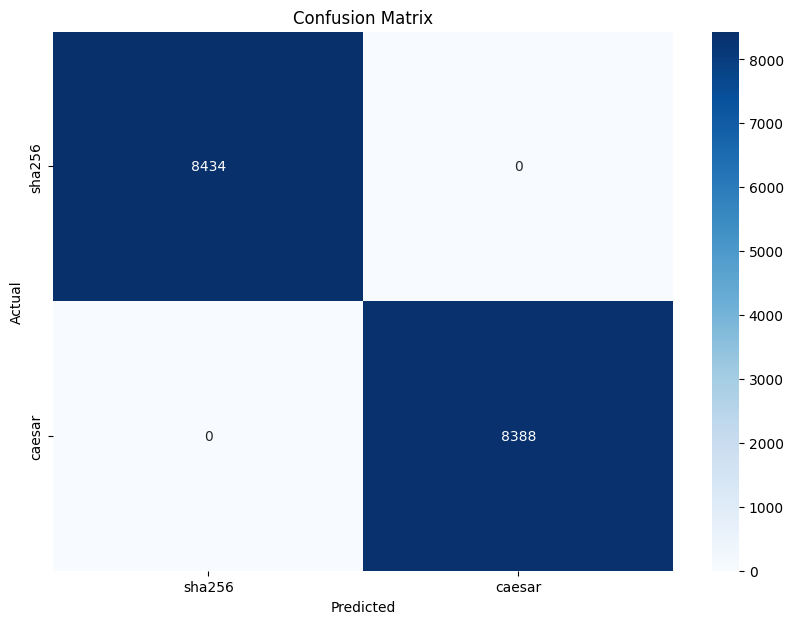

In [62]:
# Вывод отчета графиком
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [63]:
# Проверка с использованием нового значения

# Функция для извлечения признаков из одиночного примера
def extract_features_solo(encrypted_value):
    length = len(encrypted_value)  # Длина строки
    unique_chars = len(set(encrypted_value))  # Количество уникальных символов
    digit_count = sum(c.isdigit() for c in encrypted_value)  # Количество цифр
    return np.array([[length, unique_chars, digit_count]])

# Соль: world Текст: hello
sha_test_encrypted_word = "8376118fc0230e6054e782fb31ae52ebcfd551342d8d026c209997e0127b6f74"
# Ротация: 10 Текст : hallo
caesar_test_encrypted_word = "rkvvy"

In [64]:
# Извлечение признаков из нового текста sha256
test_word_features_sha = extract_features_solo(sha_test_encrypted_word)
test_word_features_sha

array([[64, 16, 45]])

In [65]:
# Извлечение признаков из нового текста Caesar
test_word_features_caesar = extract_features_solo(caesar_test_encrypted_word)
test_word_features_caesar

array([[5, 4, 0]])

In [66]:
# Предсказание модели: тип шифрования

predicted_label = model.predict(test_word_features_sha)
print(f"Предполагаемый тип шифрования: {predicted_label[0]}")

predicted_label = model.predict(test_word_features_caesar)
print(f"Предполагаемый тип шифрования: {predicted_label[0]}")

Предполагаемый тип шифрования: sha256
Предполагаемый тип шифрования: сaesar
